<Axes: title={'center': 'is 18+'}, ylabel='target'>

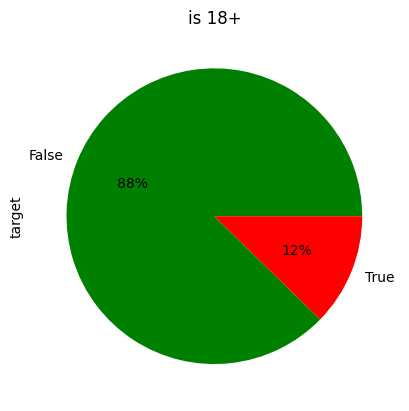

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

labeled_data = pd.read_csv('https://raw.githubusercontent.com/vadim0912/ML2023/master/lecture05/kaggle/train.csv')
unlabeled_data = pd.read_csv('https://raw.githubusercontent.com/vadim0912/ML2023/master/lecture05/kaggle/test.csv')


X = labeled_data[['url','title']]
y = labeled_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

X_validation = unlabeled_data[['url','title']]

plt.title('is 18+')
y_train.value_counts().plot(kind='pie',autopct='%1.0f%%', colors = ['green', 'red'])

In [ ]:
X_val = X.values
X_train_val = X_train.values
X_test_val = X_test.values
X_validation_val = X_validation.values
y_val = y.astype(int).values
y_train_val = y_train.astype(int).values
y_test_val = y_test.astype(int).values

In [ ]:
import re
from collections import Counter
TOKEN_PATTERN = "[а-яА-ЯёЁa-zA-Z]+"
def tokenize(text):
    return re.findall(TOKEN_PATTERN, text.lower())
docs = [tokenize(text) for text in X_train_val[:,1]]

occurence = Counter([token for doc in docs for token in doc])
occurence.most_common(30)

[('в', 28893),
 ('на', 17288),
 ('и', 16991),
 ('ru', 10726),
 ('онлайн', 8990),
 ('с', 8688),
 ('для', 7645),
 ('по', 6335),
 ('бесплатно', 6228),
 ('скачать', 5882),
 ('mail', 5112),
 ('фото', 4769),
 ('купить', 4720),
 ('страница', 4417),
 ('смотреть', 4203),
 ('от', 4063),
 ('поиск', 4018),
 ('порно', 3896),
 ('видео', 3882),
 ('porn', 2823),
 ('из', 2802),
 ('mp', 2721),
 ('интернет', 2567),
 ('как', 2544),
 ('читать', 2522),
 ('о', 2443),
 ('отзывы', 2400),
 ('цена', 2317),
 ('com', 2276),
 ('м', 2134)]

# 1. Логистическая регрессия только для title

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer(min_df = 3, stop_words = ['в','на', 'о', 'и', 'ru', 'с','com','м'], ngram_range = (1,2))

model_logreg = LogisticRegression(solver = 'sag', max_iter = 500, C=50, warm_start = True)
X_train_vectorized = vectorizer.fit_transform(X_train_val[:,1])
X_test_vectorized = vectorizer.transform(X_test_val[:,1])
model_logreg.fit(
    X_train_vectorized,
    y_train
)

y_pred_logreg = model_logreg.predict(
    X_test_vectorized
)

f1_score(y_test, y_pred_logreg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9545121056493029

In [ ]:
feature1 = model_logreg.predict_proba(X_train_vectorized)[:,0]

Submit

In [ ]:
vectorizer = CountVectorizer(min_df = 3, stop_words = ['в','на', 'и', 'ru', 'с','com','м'], ngram_range = (1,2))
model = LogisticRegression(solver = 'sag', max_iter = 500, C=50, warm_start = True)
X_vectorized = vectorizer.fit_transform(X_val[:,1])
model.fit(
    X_vectorized,
    y
)
X_validation_vectorized = vectorizer.transform(X_validation_val[:,1])
unlabeled_data["target"] = model.predict(X_validation_vectorized).astype(bool)
unlabeled_data[["id", "target"]].to_csv("logreg.csv", index=False)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 2. Логистическая регрессия с url

In [ ]:
vectorizer_url = CountVectorizer(binary = True, ngram_range = (1,2),token_pattern = '[а-яА-ЯёЁa-zA-Z0-9]+')
model_logreg_url = LogisticRegression(solver = 'sag', max_iter = 1000, C=50, warm_start = True)
X_train_vectorized = vectorizer_url.fit_transform(X_train_val[:,0])
X_test_vectorized = vectorizer_url.transform(X_test_val[:,0])
model_logreg_url.fit(
    X_train_vectorized,
    y_train
)

y_pred_logreg_url = model_logreg_url.predict(
    X_test_vectorized
)

f1_score(y_test, y_pred_logreg_url)

0.9169169169169169

Попробуем построить линейную модель на основе предсказаний для title и для url

In [ ]:
X_train_vectorized = vectorizer.transform(X_train_val[:,1])
feature1 = model_logreg.predict_proba(X_train_vectorized)[:,0]

X_train_vectorized = vectorizer_url.transform(X_train_val[:,0])
feature2 = model_logreg_url.predict_proba(X_train_vectorized)[:,0]

In [ ]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(max_iter = 1000,alpha = 250)
X_train_total = np.vstack((feature1,feature2)).T
model.fit(
    X_train_total,
    y_train
)


X_test_vectorized = vectorizer.transform(X_test_val[:,1])
feature1test = model_logreg.predict_proba(X_test_vectorized)[:,0]

X_test_vectorized = vectorizer_url.transform(X_test_val[:,0])
feature2test = model_logreg_url.predict_proba(X_test_vectorized)[:,0]

X_test_total = np.vstack((feature1test,feature2test)).T

y_pred_total = model.predict(
    X_test_total
)

f1_score(y_test, y_pred_total)

0.9722423364711561

Submit

In [ ]:
vectorizer = CountVectorizer(min_df = 3, stop_words = ['в','на', 'и', 'ru', 'с','com','м'], ngram_range = (1,2))
model_logreg = LogisticRegression(solver = 'sag', max_iter = 500, C=50, warm_start = True)
X_vectorized = vectorizer.fit_transform(X_val[:,1])
model_logreg.fit(
    X_vectorized,
    y
)
feature1 = model_logreg.predict_proba(X_vectorized)[:,0]


vectorizer_url = CountVectorizer(binary = True, ngram_range = (1,2))
model_logreg_url = LogisticRegression(solver = 'sag', max_iter = 1000, C=50, warm_start = True)
X_vectorized = vectorizer_url.fit_transform(X_val[:,0])
model_logreg_url.fit(
    X_vectorized,
    y
)
feature2 = model_logreg_url.predict_proba(X_vectorized)[:,0]


model_total = RidgeClassifier(max_iter = 1000,alpha = 200)
X_total = np.vstack((feature1,feature2)).T
model_total.fit(
    X_total,
    y
)


X_validation_vectorized = vectorizer.transform(X_validation_val[:,1])
feature1_validation = model_logreg.predict_proba(X_validation_vectorized)[:,0]

X_validation_vectorized = vectorizer_url.transform(X_validation_val[:,0])
feature2_validation = model_logreg_url.predict_proba(X_validation_vectorized)[:,0]

X_validation_total = np.vstack((feature1_validation,feature2_validation)).T

unlabeled_data["target"] = model_total.predict(X_validation_total).astype(bool)
unlabeled_data[["id", "target"]].to_csv("logreg_with_url.csv", index=False)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Можно заметить что для url подстрока porn во всех случаях оказалась в 18+ сайтах

In [ ]:
labeled_data[labeled_data.url.str.contains("porn")].target.value_counts()

True    4673
Name: target, dtype: int64

In [ ]:
labeled_data[labeled_data.url.str.contains("sex")].target.value_counts()

True     2159
False      31
Name: target, dtype: int64

In [ ]:
labeled_data[labeled_data.url.str.contains("xxx")].target.value_counts()

True     710
False      1
Name: target, dtype: int64

submit

In [ ]:
unlabeled_data.loc[unlabeled_data.url.str.contains("porn"),"target"] = True
unlabeled_data.loc[unlabeled_data.url.str.contains("xxx"),"target"] = True
unlabeled_data[["id", "target"]].to_csv("logreg_with_url2.csv", index=False)

In [ ]:
unlabeled_data[(unlabeled_data.url.str.contains("porn")) & (unlabeled_data.target == False)]

,id,url,title,target


Попробуем обучить другие модели

In [ ]:
from sklearn.linear_model import RidgeClassifier
vectorizer = CountVectorizer(binary = True,  ngram_range = (1,2))

model = RidgeClassifier(solver = 'sag', max_iter = 1000)
X_vectorized = vectorizer.fit_transform(X_val[:,0])
X_validation_vectorized = vectorizer.transform(X_validation_val[:,0])
model.fit(
    X_vectorized,
    y
)

y_pred_url = model.predict(
    X_validation_vectorized
)

f1_score(y, model.predict(X_vectorized))

0.9775443679826149

In [ ]:
vectorizer = CountVectorizer(binary = True,min_df = 3, stop_words = ['в','на', 'и', 'ru', 'с','com'], ngram_range = (1,2))

model = RidgeClassifier(max_iter = 500, solver='sag')
X_vectorized = vectorizer.fit_transform(X_val[:,1])
X_validation_vectorized = vectorizer.transform(X_validation_val[:,1])
model.fit(
    X_vectorized,
    y
)

y_pred = model.predict(
    X_validation_vectorized
)

f1_score(y, model.predict(X_vectorized))

0.9753245162870438

submit

In [ ]:
unlabeled_data.loc[(y_pred_url == True) & ( y_pred == True),"target"] = True
unlabeled_data[["id", "target"]].to_csv("ml_3.csv", index=False)